# Lung Cancer Prediction

## Importing Libraries and Loading Datasets

In [1]:
import pandas as pd
import numpy as np

In [2]:
#https://www.kaggle.com/datasets/jillanisofttech/lung-cancer-detection
cancer_df=pd.read_csv("survey_lung_cancer.csv")

## Pre-processing and Exploratory Data Analysis

In [3]:
cancer_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
cancer_df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [6]:
cancer_df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
cancer_df.duplicated().sum()

33

In [8]:
#drop duplicate data
cancer_df.drop_duplicates(inplace=True)
cancer_df.duplicated().sum()

0

In [9]:
cancer_df.shape

(276, 16)

In [10]:
for i in cancer_df.columns:
   print(cancer_df[i].value_counts())

GENDER
M    142
F    134
Name: count, dtype: int64
AGE
64    18
60    16
56    16
62    16
59    15
63    15
70    14
61    14
67    11
69    10
55    10
72    10
68     9
71     9
57     9
77     9
58     8
54     7
74     6
65     5
51     5
75     5
73     4
52     4
53     4
66     4
76     3
47     3
49     3
48     2
44     2
78     2
81     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64
SMOKING
2    150
1    126
Name: count, dtype: int64
YELLOW_FINGERS
2    159
1    117
Name: count, dtype: int64
ANXIETY
1    139
2    137
Name: count, dtype: int64
PEER_PRESSURE
2    140
1    136
Name: count, dtype: int64
CHRONIC DISEASE
2    144
1    132
Name: count, dtype: int64
FATIGUE 
2    183
1     93
Name: count, dtype: int64
ALLERGY 
2    151
1    125
Name: count, dtype: int64
WHEEZING
2    151
1    125
Name: count, dtype: int64
ALCOHOL CONSUMING
2    152
1    124
Name: count, dtype: int64
COUGHING
2    159
1    117
Name: count, dtype: int64
SHORTNESS OF 

## Data Visualization

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
sns.set_theme(palette="deep")

<Axes: xlabel='AGE', ylabel='Count'>

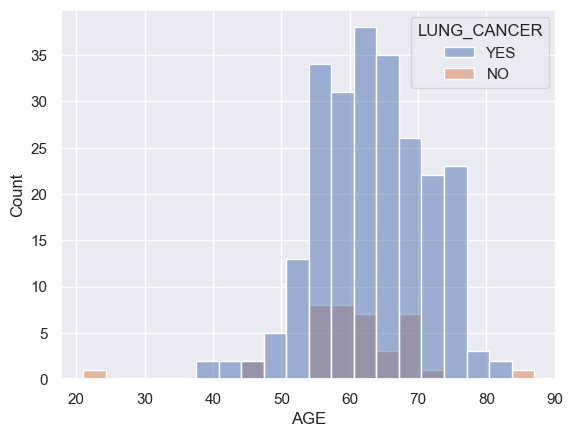

In [13]:
#histogram graph 
sns.histplot(cancer_df, x="AGE", hue="LUNG_CANCER")

In [14]:
#get column names except AGE
cancer_df_columns=[]
for i in cancer_df.columns:
    if i != "AGE" :
        cancer_df_columns.append(i)
        
print(cancer_df_columns)

['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']


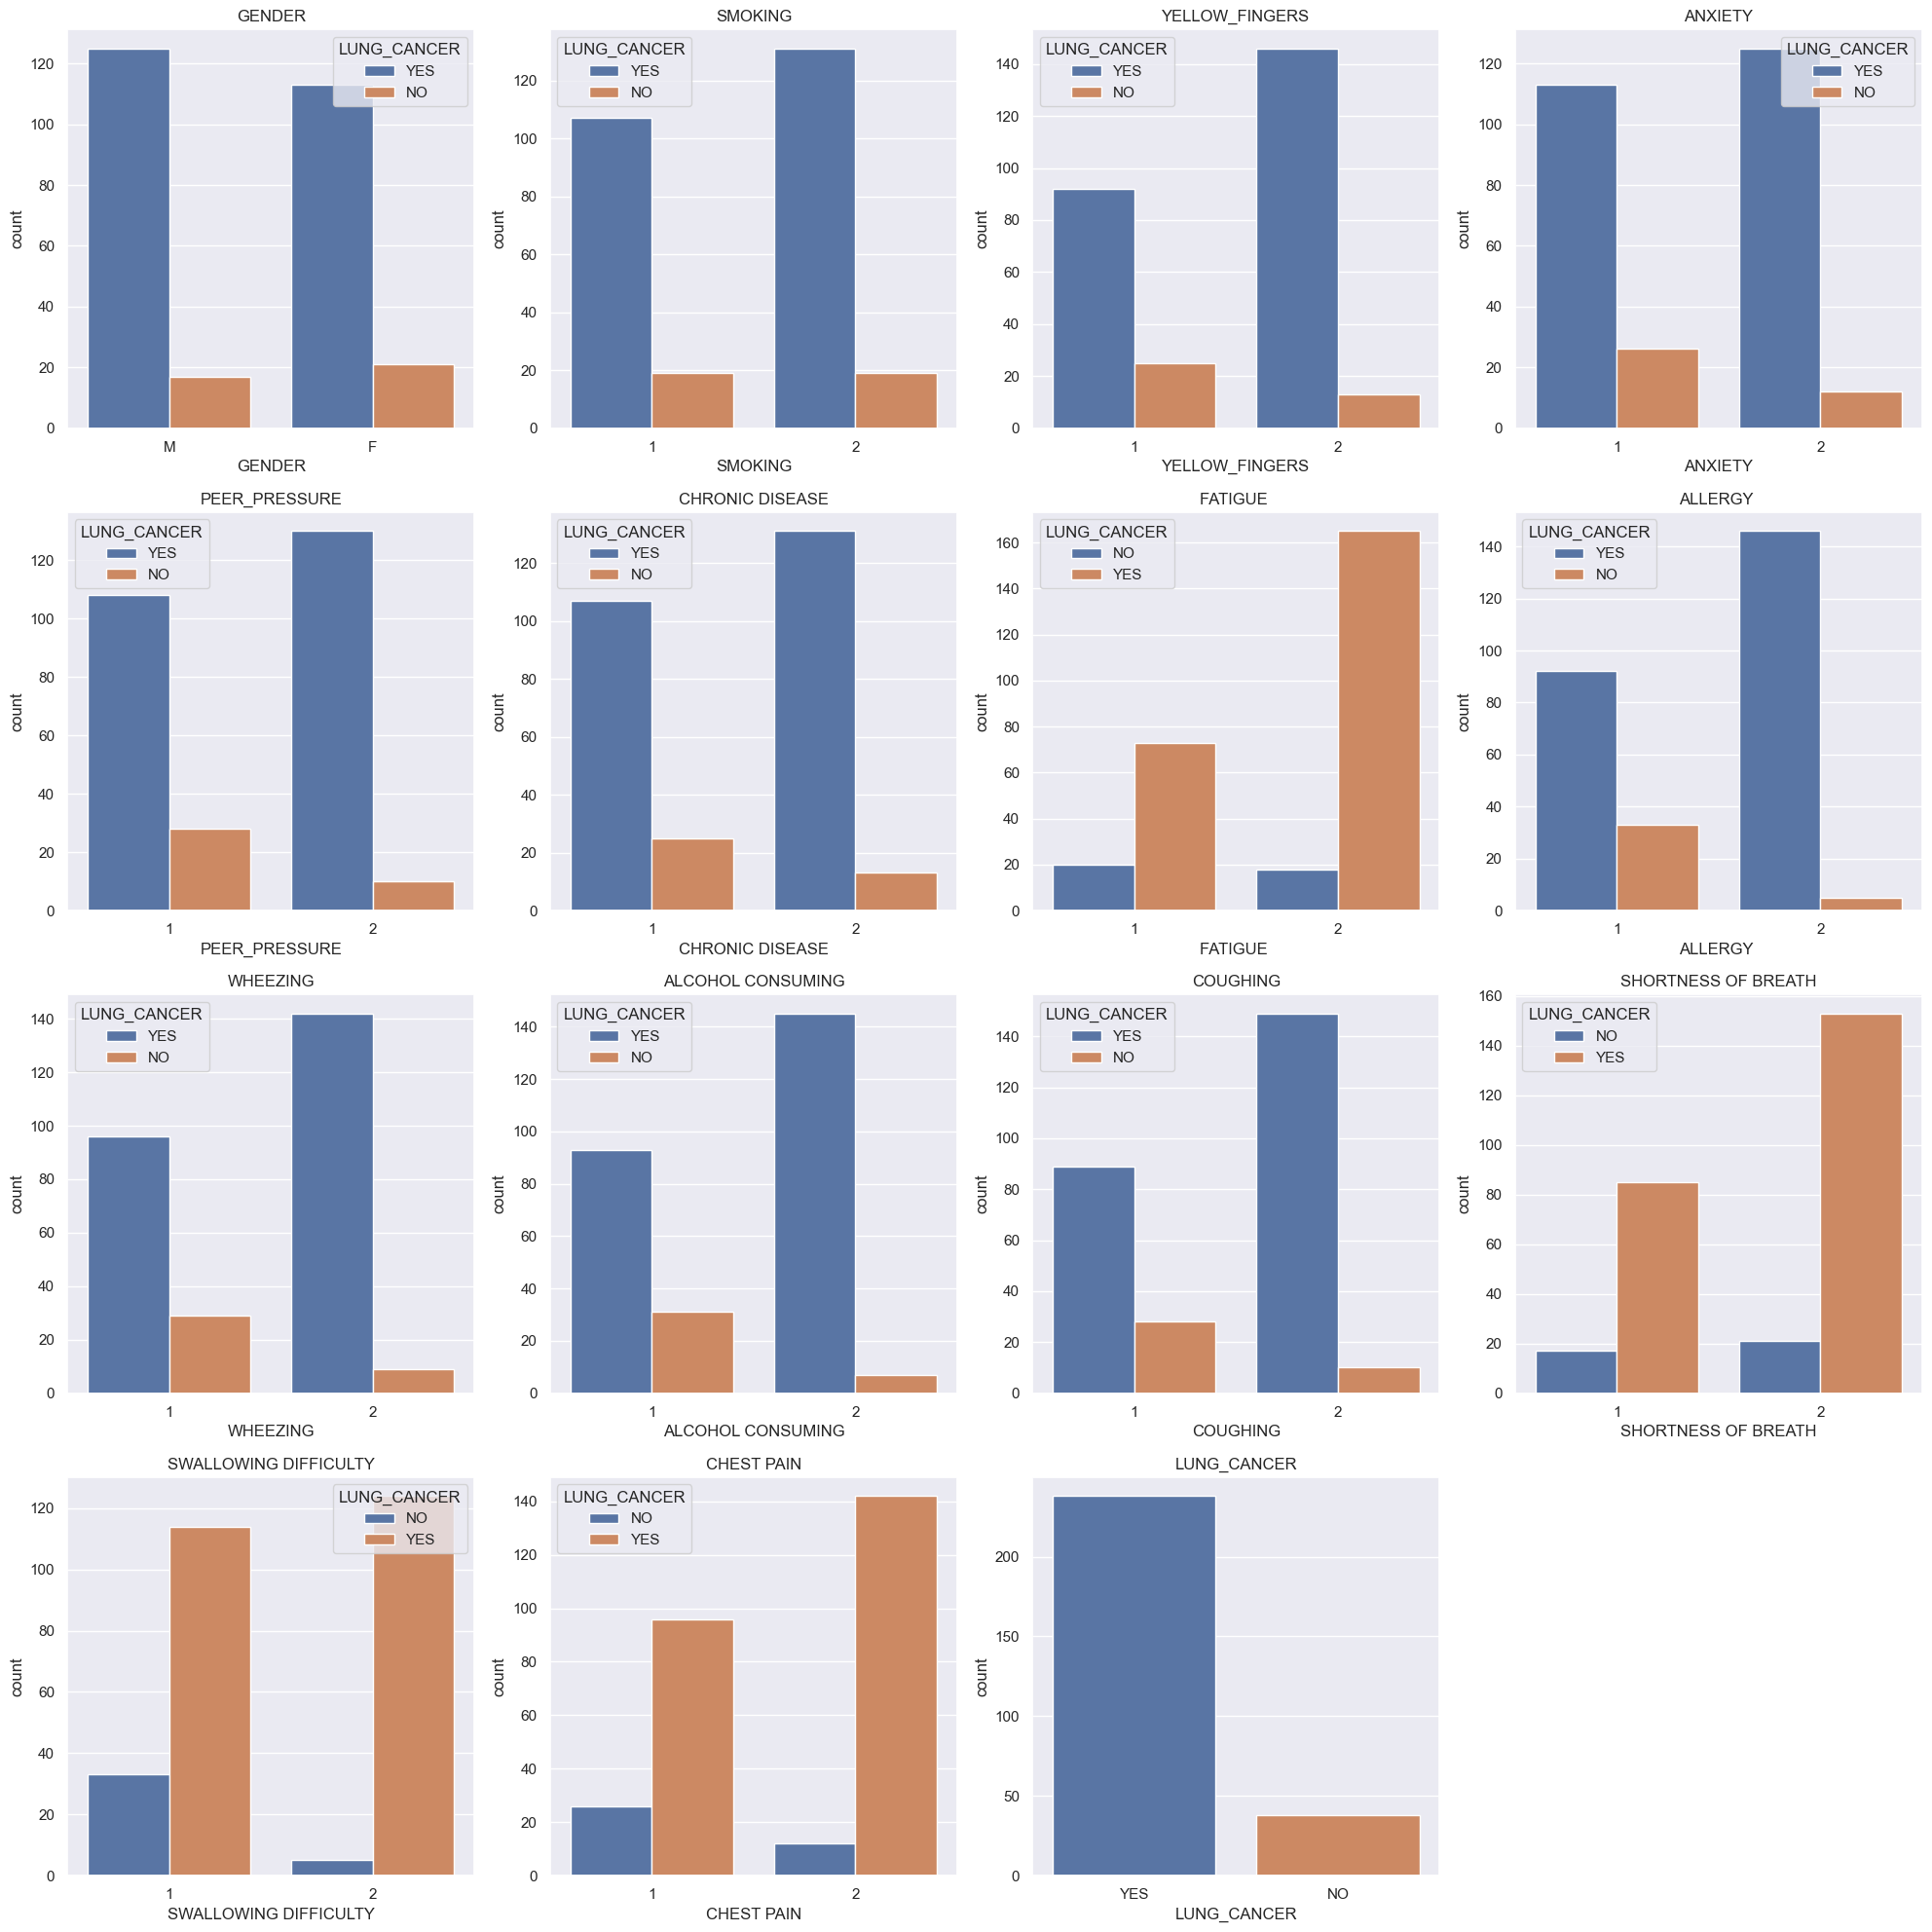

In [15]:
#creating countplot
fig, axes = plt.subplots(4, 4, figsize=(20, 20))  
axes = axes.flatten()  # converting 2D array to 1D array

#creating countplot for each column
for i, column in enumerate(cancer_df_columns):
    sns.countplot(data=cancer_df, x=column, hue="LUNG_CANCER", ax=axes[i])
    axes[i].set_title(column)

#remove empty subplots
for j in range(i+1, 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
#converting categoric data to numeric data
cancer_df["GENDER"]=cancer_df["GENDER"].replace(["M", "F"], [0, 1])
cancer_df["LUNG_CANCER"]=cancer_df["LUNG_CANCER"].replace(["NO", "YES"], [0, 1])
cancer_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [17]:
#observing correlations between different features
corr = cancer_df.corr()

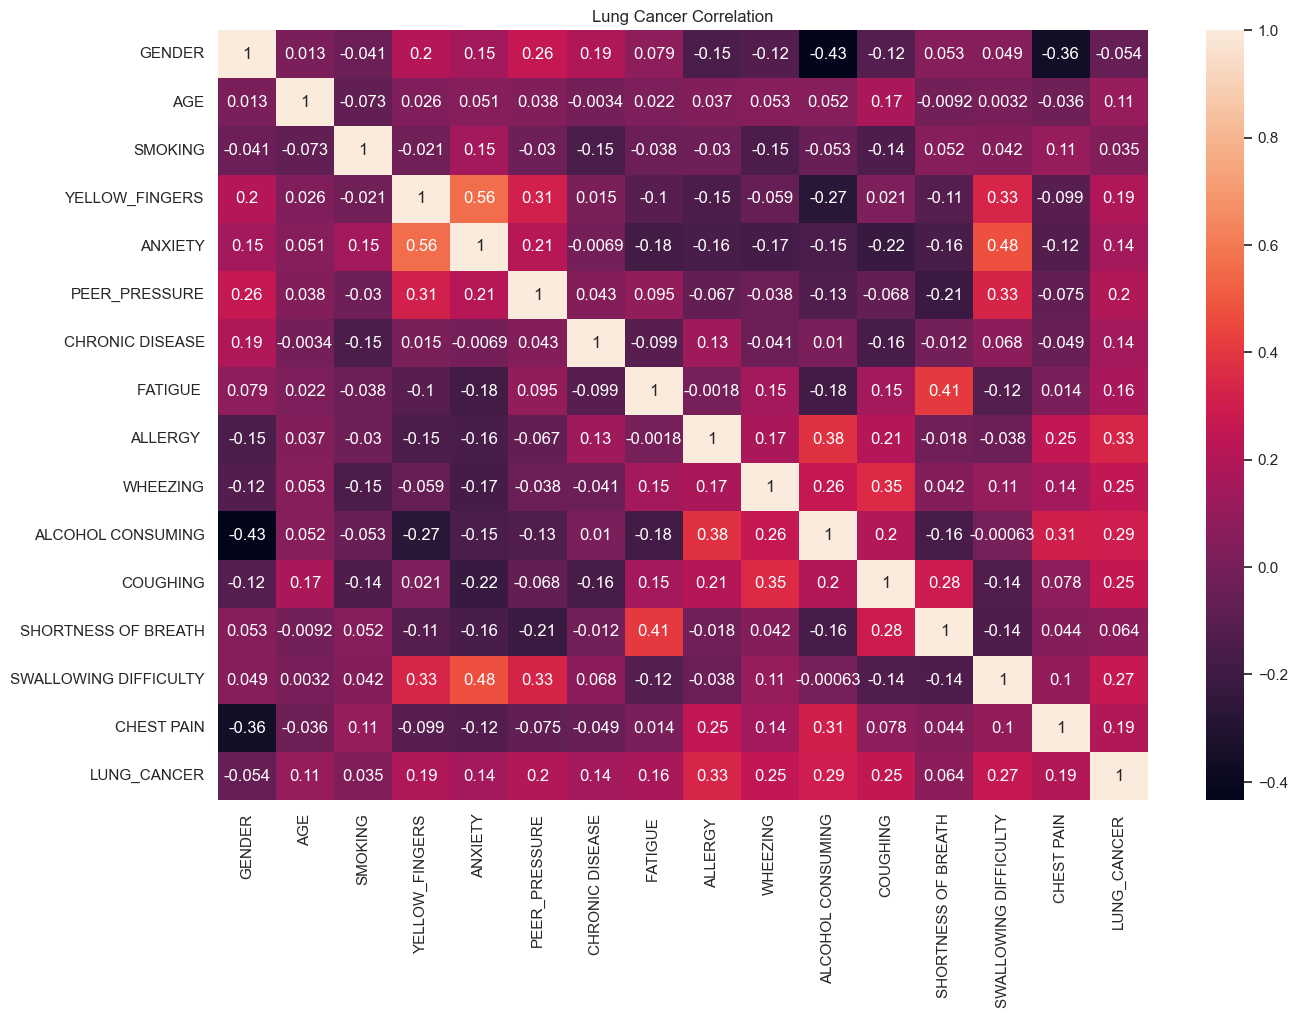

In [18]:
#heatmap for correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.title("Lung Cancer Correlation")
plt.show()

## Preparing Data Before Training

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [20]:
#select features(x) and target(y)
y=cancer_df["LUNG_CANCER"]
x=cancer_df.drop("LUNG_CANCER", axis=1)

In [21]:
#splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=0.70)

## Model Training and Performance Assesing

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lgr=LogisticRegression(solver="lbfgs", max_iter=1000)
lgr.fit(x_train, y_train)

#get accuracy score
lgr_predict= lgr.predict(x_test)
lgr_acc=accuracy_score(y_test, lgr_predict)
lgr_acc

0.891566265060241

In [24]:
#classification report review
print(classification_report(y_test, lgr_predict))

              precision    recall  f1-score   support

           0       1.00      0.31      0.47        13
           1       0.89      1.00      0.94        70

    accuracy                           0.89        83
   macro avg       0.94      0.65      0.71        83
weighted avg       0.90      0.89      0.87        83



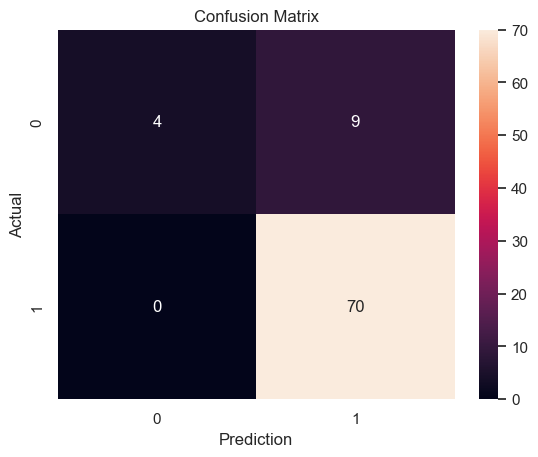

In [25]:
#creating confusion matrix for performance evaluation
cm_lgr=confusion_matrix(y_test, lgr_predict)

sns.heatmap(cm_lgr, annot = True)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
#model building
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)

#get accuracy score
dtc_predict=dtc.predict(x_test)
dtc_acc=accuracy_score(y_test, dtc_predict) 
dtc_acc

0.9036144578313253

In [28]:
#classification report review
print(classification_report(y_test, dtc_predict))

              precision    recall  f1-score   support

           0       0.86      0.46      0.60        13
           1       0.91      0.99      0.95        70

    accuracy                           0.90        83
   macro avg       0.88      0.72      0.77        83
weighted avg       0.90      0.90      0.89        83



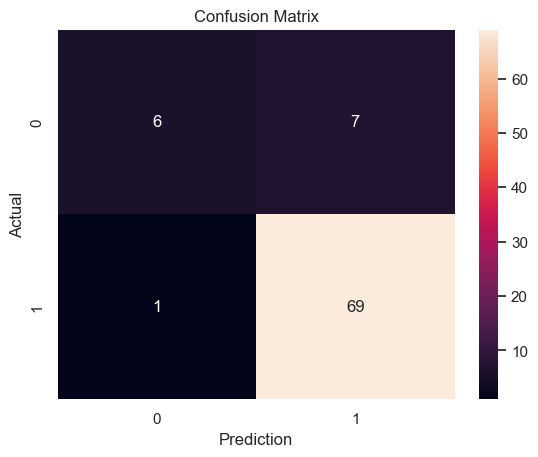

In [29]:
#creating confusion matrix for performance evaluation
cm_dtc=confusion_matrix(y_test, dtc_predict)

sns.heatmap(cm_dtc, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
#model building
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)

#get accuracy score
rfc_predict= rfc.predict(x_test)
rfc_acc=accuracy_score(y_test, rfc_predict) 
rfc_acc

0.891566265060241

In [32]:
#classification report review 
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       1.00      0.31      0.47        13
           1       0.89      1.00      0.94        70

    accuracy                           0.89        83
   macro avg       0.94      0.65      0.71        83
weighted avg       0.90      0.89      0.87        83



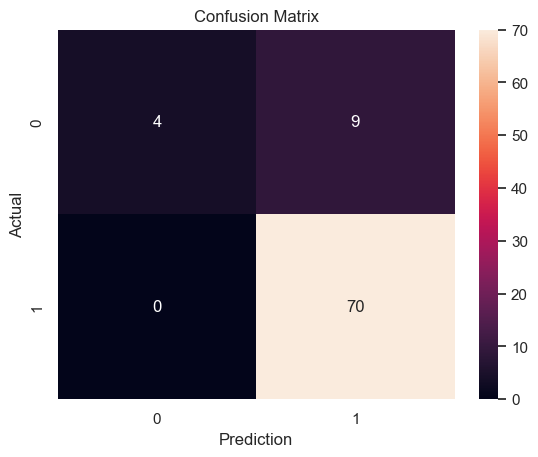

In [33]:
#creating confusion matrix for performance evaluation
cm_rfc=confusion_matrix(y_test, rfc_predict)

sns.heatmap(cm_rfc, annot = True)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### XGBoost: XGBClassifier

In [34]:
import xgboost as xgb

In [35]:
#model building
xg=xgb.XGBClassifier()
xg.fit(x_train, y_train)

#get accuracy score
xgb_predict=xg.predict(x_test)
xgb_acc=accuracy_score(y_test, xgb_predict) 
xgb_acc

0.8795180722891566

In [36]:
#classification report review
print(classification_report(y_test, xgb_predict))

              precision    recall  f1-score   support

           0       0.71      0.38      0.50        13
           1       0.89      0.97      0.93        70

    accuracy                           0.88        83
   macro avg       0.80      0.68      0.72        83
weighted avg       0.87      0.88      0.86        83



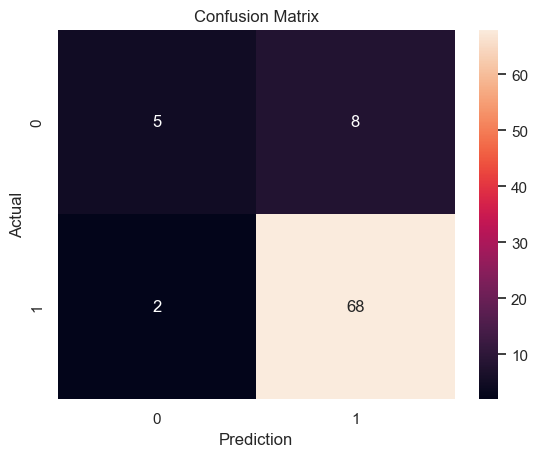

In [37]:
#creating confusion matrix for performance evaluation
cm_xgb=confusion_matrix(y_test, xgb_predict)

sns.heatmap(cm_xgb, annot = True)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
#comparing models with accuracy score
print(f"Logistic Regression: {lgr_acc}"'\n'
      f"Decision Tree Classifier: {dtc_acc}"'\n'
      f"Random Forest Classifier: {rfc_acc}"'\n'
      f"XGBoost: XGBClassifier: {xgb_acc}"'\n')


Logistic Regression: 0.891566265060241
Decision Tree Classifier: 0.9036144578313253
Random Forest Classifier: 0.891566265060241
XGBoost: XGBClassifier: 0.8795180722891566

